Mental disorders are the leading causes of the global health-related burden and account for 10.6% of total disability among older adults, with depression and anxiety disorders being the most common contributors to this burden. In this project we aim to provide statistical analysis using global mental disorder dataset. 

# Dataset Overview

The dataset used in this analysis contains global mental health disorder prevalence estimates across countries from 1990 to 2017. It includes annual measurements for several major mental health conditions, such as:

- Depression
- Anxiety disorders
- Bipolar disorder
- Schizophrenia
- Eating disorders
- Other mental and substance-related disorders

<h4> Key Variables </h4>

The dataset contains:

- Country – name of the reporting country
- Year – from 1990 to 2017
- Prevalence (%) for several mental health disorders
- Population-level aggregated prevalence measures
- Derived fields you computed, such as:
- Mean yearly prevalence
- Ratios between disorders

Dataset Link - https://www.kaggle.com/datasets/imtkaggleteam/mental-health/data

# Setup and Data Loading

In [5]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(reshape2)

In [6]:
path <- "1- mental-illnesses-prevalence.csv"
data <- read.csv(path)

prevalence_cols <- c('Schizophrenia', 'Depressive', 'Anxiety', 'Bipolar', 'Eating')
head(data)

Entity      Code Year Schizophrenia Depressive Anxiety  Bipolar   Eating   
1 Afghanistan AFG  1990 0.2232058     4.996118   4.713314 0.7030231 0.1277000
2 Afghanistan AFG  1991 0.2224538     4.989290   4.702100 0.7020688 0.1232559
3 Afghanistan AFG  1992 0.2217512     4.981346   4.683743 0.7007920 0.1188441
4 Afghanistan AFG  1993 0.2209872     4.976958   4.673549 0.7000869 0.1150889
5 Afghanistan AFG  1994 0.2201830     4.977782   4.670810 0.6998978 0.1118147
6 Afghanistan AFG  1995 0.2194088     4.978228   4.668100 0.6997684 0.1085070

# Exploratory Data Analysis (EDA) & Distributions

We are going to apply Exploratory Data Analysis to get a basic understanding of the dataset before running statistical tests. EDA will helps us see how each mental disorder is distributed, identify any patterns or outliers and check whether assumptions for later methods like t-tests, Confidence Intervals and Bootstrapping are reasonable. This step also lets us compare overall prevalence levels, spot trends over time, and detect unusual behavior in the data. Overall, EDA builds the foundation for all further statistical analysis in the project.

In [7]:
summary(data)

    Entity              Code                Year      Schizophrenia   
 Length:6420        Length:6420        Min.   :1990   Min.   :0.1884  
 Class :character   Class :character   1st Qu.:1997   1st Qu.:0.2423  
 Mode  :character   Mode  :character   Median :2004   Median :0.2735  
                                       Mean   :2004   Mean   :0.2666  
                                       3rd Qu.:2012   3rd Qu.:0.2866  
                                       Max.   :2019   Max.   :0.4620  
   Depressive       Anxiety         Bipolar           Eating       
 Min.   :1.522   Min.   :1.880   Min.   :0.1817   Min.   :0.04478  
 1st Qu.:3.080   1st Qu.:3.426   1st Qu.:0.5209   1st Qu.:0.09642  
 Median :3.637   Median :3.940   Median :0.5793   Median :0.14415  
 Mean   :3.767   Mean   :4.102   Mean   :0.6370   Mean   :0.19566  
 3rd Qu.:4.366   3rd Qu.:4.564   3rd Qu.:0.8444   3rd Qu.:0.25117  
 Max.   :7.646   Max.   :8.625   Max.   :1.5067   Max.   :1.03169  

In [8]:
str(data)

'data.frame':	6420 obs. of  8 variables:
 $ Entity       : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Code         : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ Year         : int  1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 ...
 $ Schizophrenia: num  0.223 0.222 0.222 0.221 0.22 ...
 $ Depressive   : num  5 4.99 4.98 4.98 4.98 ...
 $ Anxiety      : num  4.71 4.7 4.68 4.67 4.67 ...
 $ Bipolar      : num  0.703 0.702 0.701 0.7 0.7 ...
 $ Eating       : num  0.128 0.123 0.119 0.115 0.112 ...


In [9]:
# to check missing values
colSums(is.na(data))

Entity          Code          Year Schizophrenia    Depressive 
            0             0             0             0             0 
      Anxiety       Bipolar        Eating 
            0             0             0

In [10]:
# to check duplicate rows
sum(duplicated(data))

[1] 0

In [11]:
cor(data[, prevalence_cols], use = "complete.obs")

Schizophrenia Depressive  Anxiety   Bipolar   Eating     
Schizophrenia  1.0000000    -0.47499363 0.3041493 0.1215424  0.50065622
Depressive    -0.4749936     1.00000000 0.1144289 0.1530393 -0.05206717
Anxiety        0.3041493     0.11442890 1.0000000 0.5762305  0.59451146
Bipolar        0.1215424     0.15303928 0.5762305 1.0000000  0.67792699
Eating         0.5006562    -0.05206717 0.5945115 0.6779270  1.00000000

In [12]:
data %>% group_by(Year) %>% summarise(across(all_of(prevalence_cols), mean))

Year Schizophrenia Depressive Anxiety  Bipolar   Eating   
1  1990 0.2655449     3.816706   4.067391 0.6357828 0.1827255
2  1991 0.2656017     3.814530   4.067576 0.6357917 0.1827695
3  1992 0.2656438     3.812701   4.067882 0.6358107 0.1829092
4  1993 0.2656719     3.811056   4.068179 0.6358347 0.1831262
5  1994 0.2656820     3.809931   4.068545 0.6358683 0.1834185
6  1995 0.2656705     3.809265   4.068717 0.6359016 0.1837423
7  1996 0.2656261     3.810262   4.069669 0.6359234 0.1842011
8  1997 0.2655513     3.813660   4.072242 0.6359365 0.1848377
9  1998 0.2654745     3.817467   4.075761 0.6359525 0.1855891
10 1999 0.2654216     3.819968   4.079475 0.6359762 0.1864633
11 2000 0.2654276     3.819252   4.082278 0.6360017 0.1873830
12 2001 0.2655606     3.815096   4.083574 0.6362091 0.1885978
13 2002 0.2658171     3.808800   4.083868 0.6366632 0.1901669
14 2003 0.2661204     3.801148   4.083774 0.6371957 0.1919310
15 2004 0.2663973     3.792964   4.083801 0.6376402 0.1936615
16 2005 0.2665730     3.785159   4.084334 0.6378281 0.1951587
17 2006 0.2666948     3.774326   4.088176 0.6377980 0.1965835
18 2007 0.2668435     3.758547   4.096471 0.6377414 0.1982486
19 2008 0.2669964     3.741697   4.106785 0.6376895 0.2000143
20 2009 0.2671311     3.727111   4.116499 0.6376671 0.2016603
21 2010 0.2672325     3.717959   4.122687 0.6376747 0.2030665
22 2011 0.2673545     3.713053   4.127244 0.6376993 0.2042738
23 2012 0.2675348     3.708299   4.133329 0.6377174 0.2054709
24 2013 0.2677300     3.704419   4.140236 0.6377521 0.2066255
25 2014 0.2679019     3.701329   4.146628 0.6377875 0.2077971
26 2015 0.2680117     3.699687   4.151167 0.6378123 0.2089736
27 2016 0.2681551     3.698422   4.152897 0.6378239 0.2107651
28 2017 0.2682847     3.697866   4.153513 0.6378389 0.2123662
29 2018 0.2682784     3.701513   4.155007 0.6378583 0.2132966
30 2019 0.2681892     3.708886   4.157485 0.6378751 0.2140990

We can ananlyze this yearly summary data to confirm that the dataset contains stable yearly trends before plotting them

In [13]:
sapply(data[,prevalence_cols], var)

Schizophrenia    Depressive       Anxiety       Bipolar        Eating 
  0.001551007   0.856153874   1.103640804   0.054471249   0.019149086

So, from the data above we can see that Anxiety shows the most fluctuation globally.

These statistics show that depression and anxiety have much higher mean prevalence globally compared to the other disorders. 

Schizophrenia and eating disorders have the lowest and least variable prevalence

# Distribution of Depression Prevalence

Distribution of depression prevalence will show how common depression is across all countries and years. 

The histogram and density curve will help us identify the typical range, shape of the distribution and whether the data is skewed or not. This is important because the shape of the distribution influences our statistical tests.

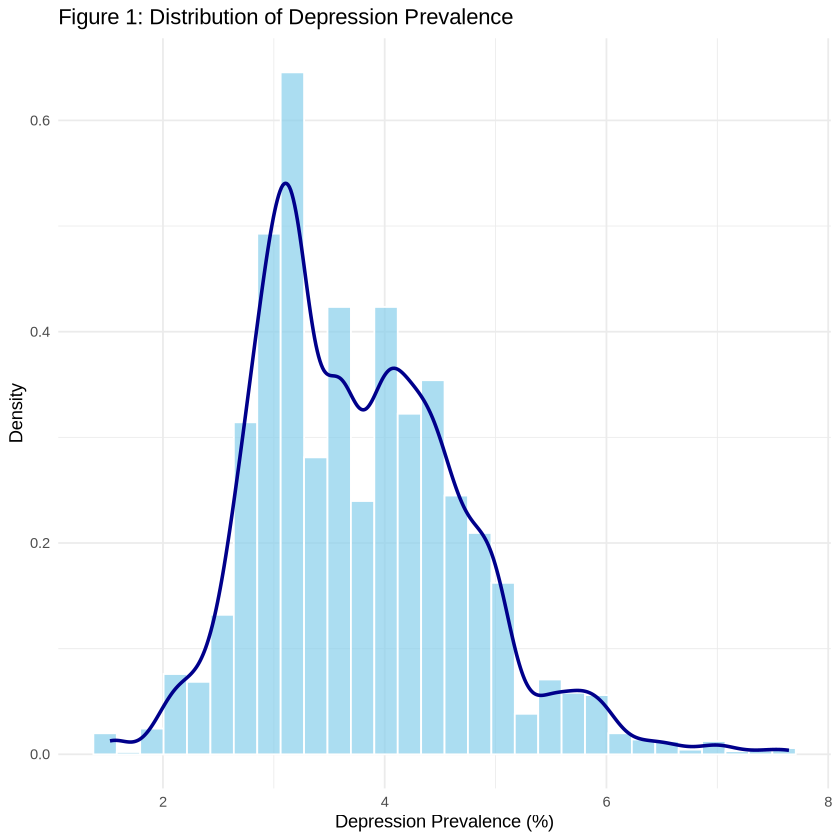

In [14]:
depression_plot <- ggplot(data, aes(x = Depressive)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "skyblue", color = "white", alpha = 0.7) +
  geom_density(color = "darkblue", linewidth = 1) +
  labs(title = "Figure 1: Distribution of Depression Prevalence",x = "Depression Prevalence (%)",y = "Density") +
  theme_minimal()
print(depression_plot)

This distribution is slightly right-skewed with most values between 2–5%. 

The density curve shows us a single main peak which has no extreme outliers.

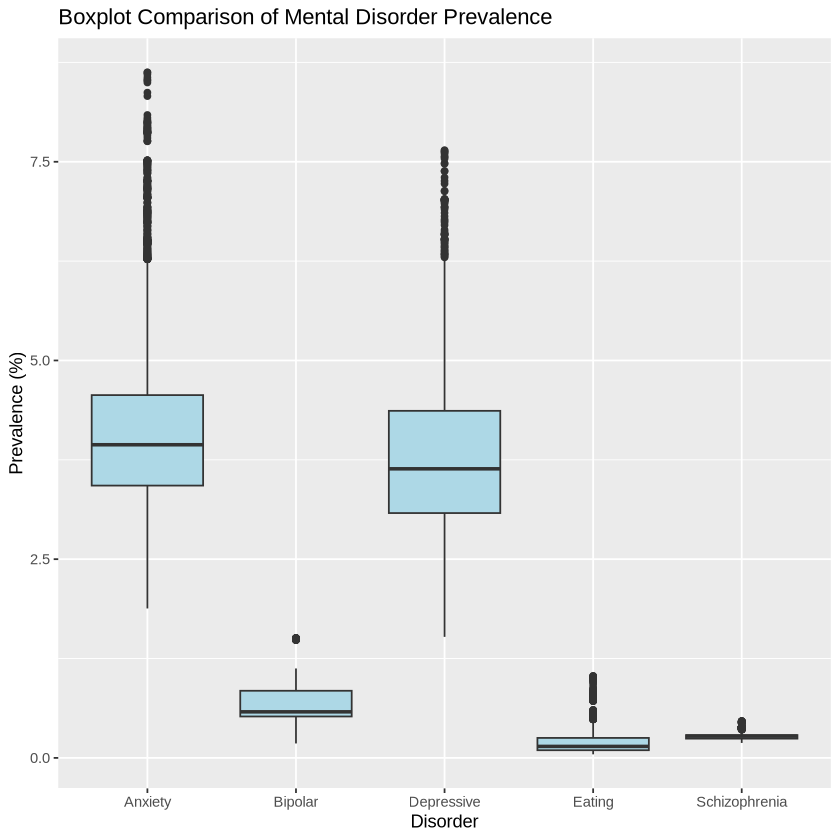

In [15]:
df_l <- data %>%
  select(all_of(prevalence_cols)) %>%
  pivot_longer(cols = everything(), names_to = "Disorder", values_to = "Prevalence")
ggplot(df_l, aes(x = Disorder, y = Prevalence)) + geom_boxplot(fill = "lightblue") +labs(title = "Boxplot Comparison of Mental Disorder Prevalence",y = "Prevalence (%)")

# Temporal and Geospatial Analysis

In this analysis, we will check both temporal patterns and geographical differences in mental disorder prevalence. 

The time-series plot will show long term global trends and will help us identify whether any disorders are becoming more common over time. 

The country-level comparison will reveal which regions consistently show higher or lower prevalence, these can provide insights into global disparities in mental health

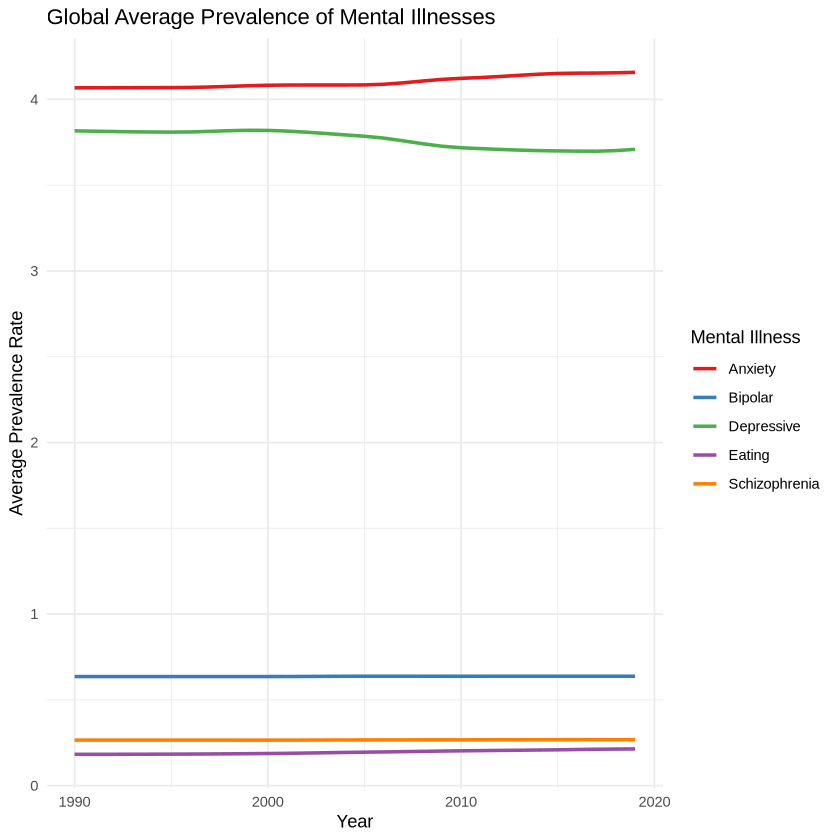

In [16]:
df_year_mean <- data %>%
  group_by(Year) %>%
  summarise(across(all_of(prevalence_cols), mean, .names = "Mean_{.col}")) %>%
  pivot_longer(cols = starts_with("Mean_"), names_to = "Mental_Illness",values_to = "Average_Prevalence") %>%
  mutate(Mental_Illness = gsub("Mean_", "", Mental_Illness))
timeseries_plot <- ggplot(df_year_mean, aes(x = Year, y = Average_Prevalence, color = Mental_Illness)) + geom_line(linewidth = 1) +
  labs(title = "Global Average Prevalence of Mental Illnesses",x = "Year",y = "Average Prevalence Rate",
      color = "Mental Illness") + scale_color_brewer(palette = "Set1") +theme_minimal()
print(timeseries_plot)

The Global trends remain stable over time with anxiety and depression consistently having the highest prevalence. 

Schizophrenia and bipolar disorder remain low and stable across years.

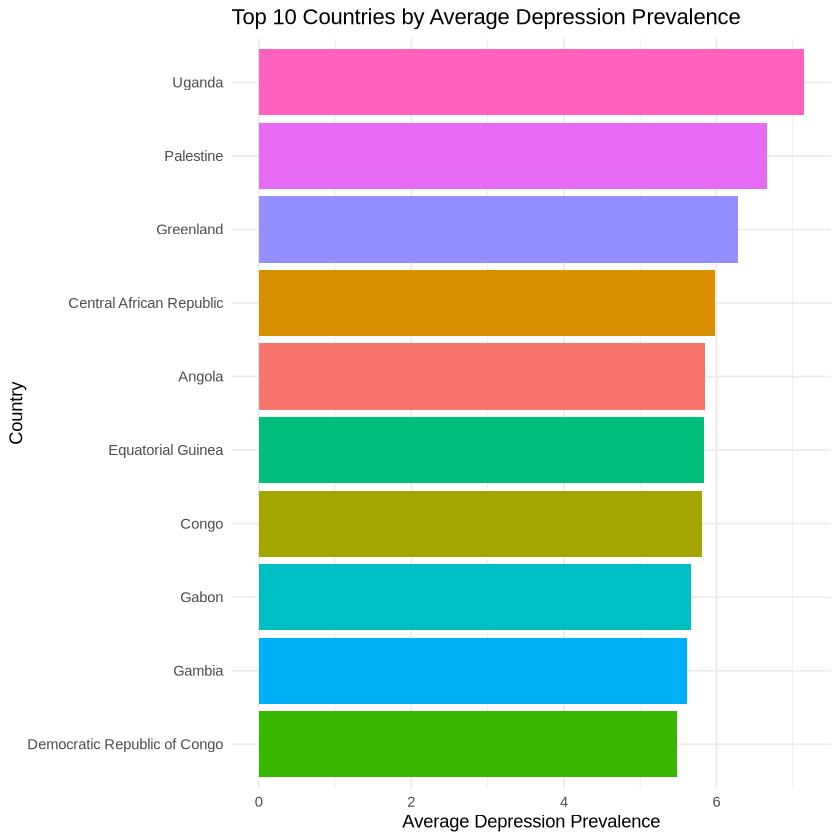

In [17]:
# Top 10 Countries by Average Depression Prevalence
top_cntry <- data %>%
  as_tibble() %>%
  group_by(Entity) %>%
  summarise(mean_depression = mean(Depressive, na.rm = TRUE)) %>%
  arrange(desc(mean_depression)) %>%
  slice(1:10) %>%
  ungroup()

top_cntry_pt <- ggplot(top_cntry, aes(x = reorder(Entity, mean_depression),y = mean_depression, fill = Entity)) +
  geom_bar(stat = "identity") + coord_flip() + labs(title = "Top 10 Countries by Average Depression Prevalence",
       y = "Average Depression Prevalence", x = "Country") + theme_minimal() + theme(legend.position = "none")
print(top_cntry_pt)

The above bar plot shows us the Top 10 countries with average Depression Prevalance

# Advanced Statistical Inference and Correlation

In this section we will be applying statistical inference techniques to explore relationships between different mental disorders. 


By using correlation analysis, hypothesis testing and variance comparisons, we can understand how strongly disorders are related and whether their average prevalence differs. 

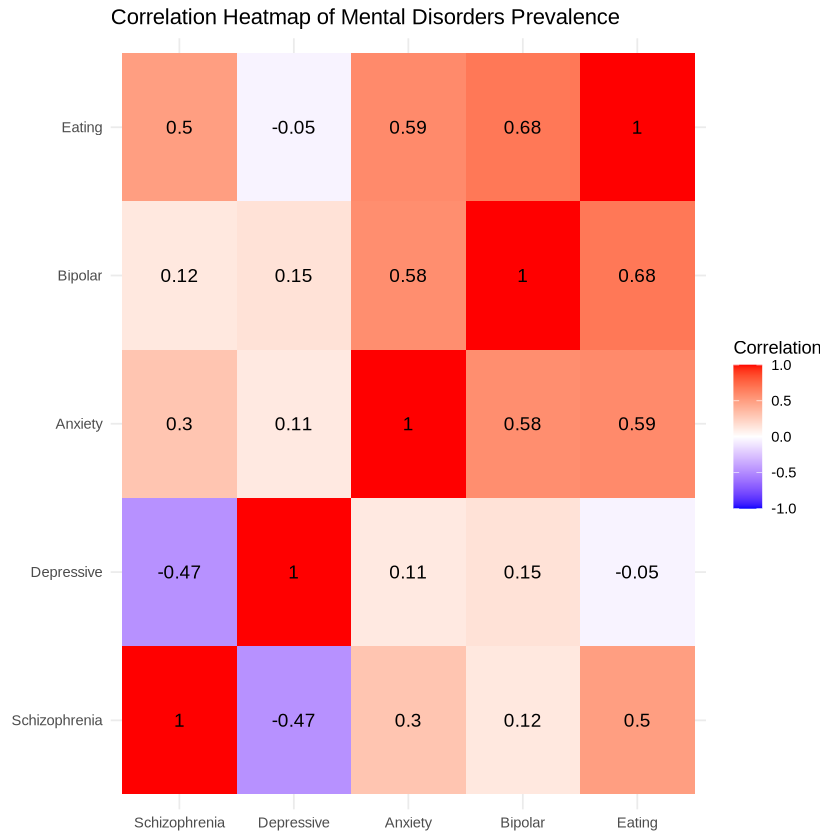

In [18]:
# Correlation Heatmap of Mental Disorders
cor_data <- cor(data[, c("Schizophrenia", "Depressive", "Anxiety", "Bipolar", "Eating")], use = "complete.obs")
melted <- melt(cor_data)

heatmap_pt <- ggplot(melted, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() + geom_text(aes(label = round(value, 2)), color = "black", size = 4) + scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1, 1)) +
  labs(title = "Correlation Heatmap of Mental Disorders Prevalence", fill = "Correlation") + theme_minimal() +
  theme(axis.title.x = element_blank(), axis.title.y = element_blank())
print(heatmap_pt)

Depression and anxiety show the strongest positive correlation. 

Schizophrenia has the weakest correlations

In [19]:
data <- data %>% mutate(decade = floor(Year / 10) * 10)
cor_by_decade <- data %>%
  group_by(decade) %>%
  summarise(across(all_of(prevalence_cols), mean), .groups = "drop")
cor_matrix <- cor(cor_by_decade[, -1])
cor_matrix

Schizophrenia Depressive Anxiety    Bipolar    Eating    
Schizophrenia  1.0000000    -0.9985115  0.9978977  0.9084825  0.9956109
Depressive    -0.9985115     1.0000000 -0.9999471 -0.8843364 -0.9890245
Anxiety        0.9978977    -0.9999471  1.0000000  0.8794872  0.9874523
Bipolar        0.9084825    -0.8843364  0.8794872  1.0000000  0.9436082
Eating         0.9956109    -0.9890245  0.9874523  0.9436082  1.0000000

In [20]:
# Covariance and Correlation between Depressive and Anxiety disorders
cov_res <- cov(data$Depressive, data$Anxiety, use = "complete.obs")
cor_res <- cor(data$Depressive, data$Anxiety, use = "complete.obs")
print(paste("Covariance (Depressive, Anxiety):", round(cov_res, 4)))
print(paste("Correlation (Depressive, Anxiety):", round(cor_res, 4)))

[1] "Covariance (Depressive, Anxiety): 0.1112"
[1] "Correlation (Depressive, Anxiety): 0.1144"


In [21]:
var_test <- var.test(data$Depressive, data$Anxiety)
var_test


	F test to compare two variances

data:  data$Depressive and data$Anxiety
F = 0.77575, num df = 6419, denom df = 6419, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7387095 0.8146564
sample estimates:
ratio of variances 
         0.7757541 


The variance test compares the variability of depression and anxiety prevalence

We have received a ratio of 0.7757541 for our variances 

In [22]:
# Paired T-test (Testing for a mean difference between Depression and Anxiety)
# H0: Mean Depressive Prevalence = Mean Anxiety Prevalence

paired_t_test <- t.test(data$Depressive, data$Anxiety, paired = TRUE, na.action = na.omit)
print("\nPaired T-test (Depressive vs. Anxiety Prevalence):")
print(paired_t_test)

[1] "\nPaired T-test (Depressive vs. Anxiety Prevalence):"

	Paired t-test

data:  data$Depressive and data$Anxiety
t = -20.352, df = 6419, p-value < 2.2e-16
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -0.3670519 -0.3025557
sample estimates:
mean difference 
     -0.3348038 



The t-test shows a significant difference between depression and anxiety prevalence. 

Anxiety prevalence is consistently higher on average

# Inferential Techniques - Confidence Intervals and Bootstrapping

We will be using confidence intervals and bootstrapping to estimate the true average prevalence of mental disorders. 

Confidence intervals provide a range of plausible values for the population mean, while bootstrapping will allow us to make these estimates without assuming that the data follows a normal distribution.

In [23]:
x <- data$Depressive
mean_x <- mean(x, na.rm = TRUE)
sd_x <- sd(x, na.rm = TRUE)
n <- sum(!is.na(x))

# To calculate the 95% Confidence Interval
error <- qt(0.975, df = n - 1) * sd_x / sqrt(n)
CI <- c(mean_x - error, mean_x + error)
print(paste("Mean Depression Prevalence :", round(mean_x, 4)))
print(paste("95 percent CI T- Method :", round(CI[1], 4), "to", round(CI[2], 4)))

[1] "Mean Depression Prevalence : 3.767"
[1] "95 percent CI T- Method : 3.7444 to 3.7897"


[1] "95 percent CI Bootstrap Percentile Method : 3.7462 to 3.7905"


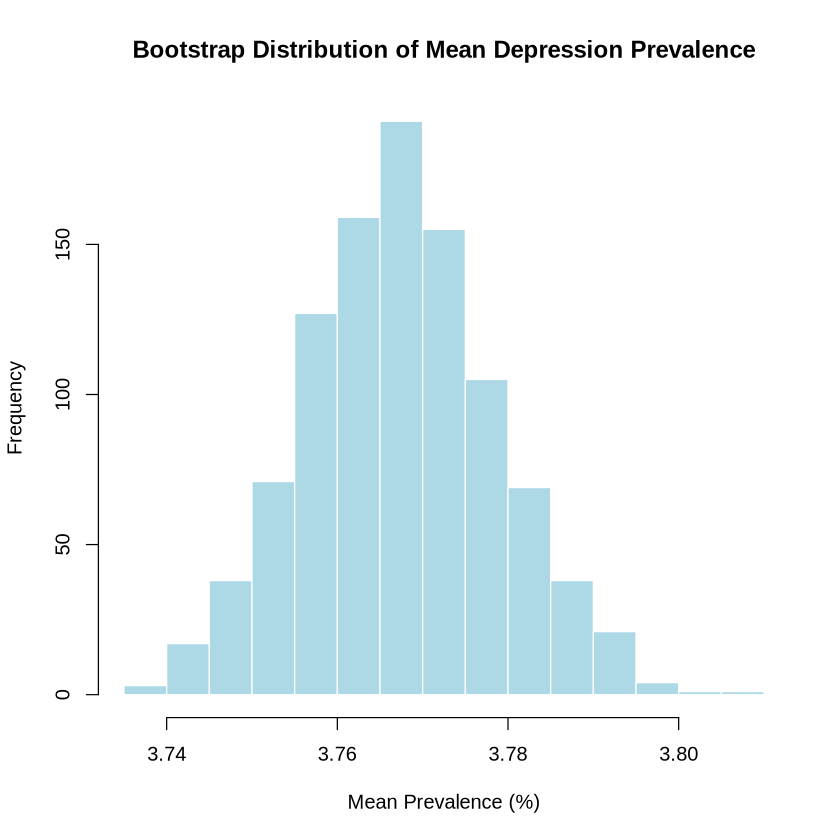

In [24]:
# Bootstrap Distribution and Confidence Interval
set.seed(77)
boot_m <- replicate(1000, mean(sample(x, size = n, replace = TRUE), na.rm = TRUE))
hist(boot_m,
     main = "Bootstrap Distribution of Mean Depression Prevalence", xlab = "Mean Prevalence (%)", col = "lightblue", border = "white")
boot_CI <- quantile(boot_m, c(0.025, 0.975))
print(paste("95 percent CI Bootstrap Percentile Method :", round(boot_CI[1], 4), "to", round(boot_CI[2], 4)))

The bootstrap distribution of sample means is nearly symmetric and centered around the observed mean

The bootstrap interval matches the Confidence Interval. 

This confirms that the estimated mean is stable and does not depend on normality assumptions.

In [25]:
x2 <- data$Anxiety
mean_x2 <- mean(x2, na.rm = TRUE)
sd_x2 <- sd(x2, na.rm = TRUE)
n2 <- sum(!is.na(x2))
error2 <- qt(0.975, df = n2 - 1) * sd_x2 / sqrt(n2)
CI2 <- c(mean_x2 - error2, mean_x2 + error2)
CI2

[1] 4.076137 4.127542

In [26]:
set.seed(123)
boot_anx <- replicate(1000, mean(sample(x2, size = n2, replace = TRUE)))
quantile(boot_anx, c(0.025, 0.975))

2.5%    97.5% 
4.078743 4.127152

# Statistical Simulations and Fits

we wil be applying statistical simulations to better understand the behavior of sample means and assess how well a theoretical distribution fits the observed prevalence values. These tools help validate assumptions used in earlier analyses and illustrate fundamental statistical principles like the Law of Large Numbers

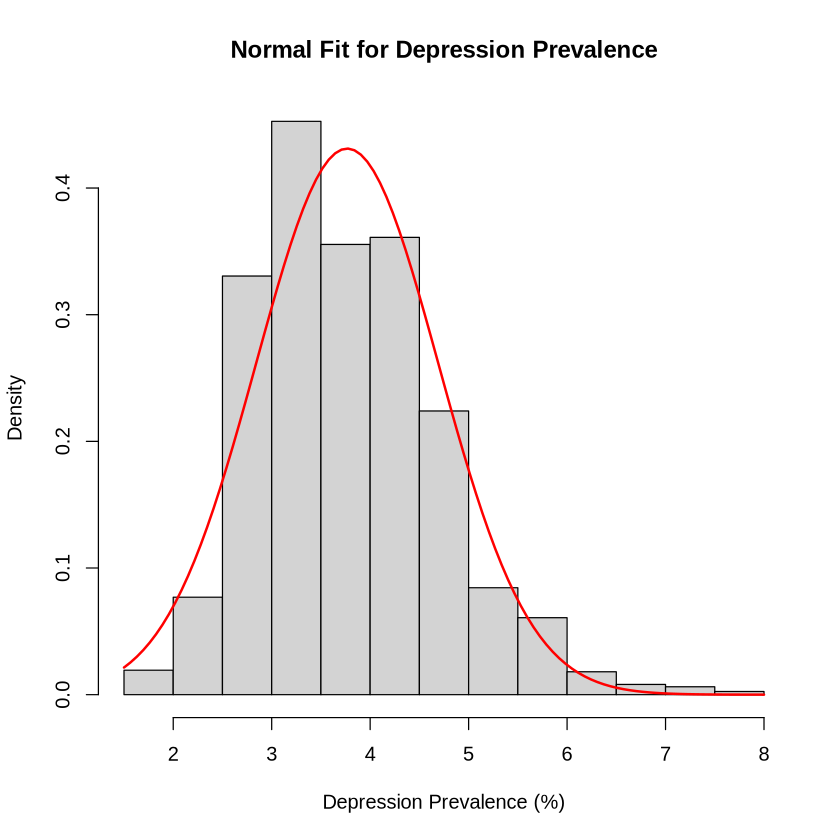

In [29]:
# Normal Fit for Depression Prevalence
x <- data$Depressive
mean_x <- mean(x, na.rm = TRUE)
sd_x <- sd(x, na.rm = TRUE)

hist(x, prob = TRUE, main = "Normal Fit for Depression Prevalence", xlab = "Depression Prevalence (%)")
curve(dnorm(x, mean = mean_x, sd = sd_x), add = TRUE, col = "red", lwd = 2)

The curve aligns well with the histogram. This tells us that the depression distribution is approximately normal

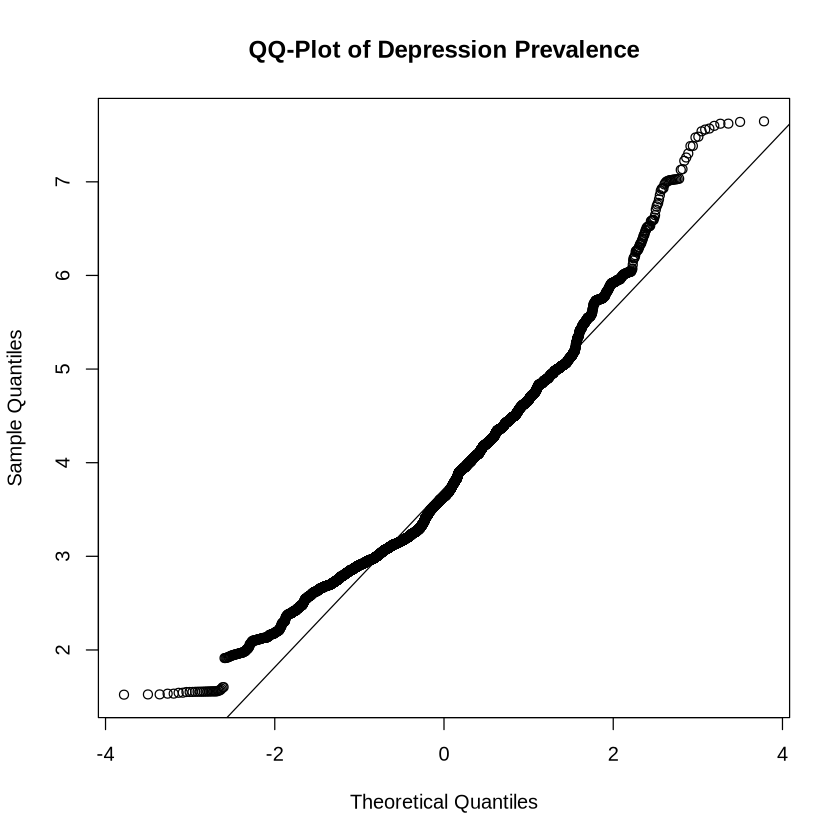

In [30]:
qqnorm(data$Depressive, main = "QQ-Plot of Depression Prevalence")
qqline(data$Depressive)

QQ-plots help assess how closely the depression data follows a normal distribution, which supports the use of normal-based inference methods earlier in the analysis.

In [28]:
write.csv(data, "cleaned_mental_illnesses_prevalence.csv", row.names = FALSE)